In [1]:
    try:
        from google.colab import drive

        print('Colab environment detected. Mounting drive...')
        drive.mount('/content/drive')

        print('Mounted. Switching to directory... ', end = '')
        %cd /content/drive/'My Drive'/CILroadseg
        print('done.')
    except:
        print('Colab environment not found. Working on ordinary directory.')

Colab environment detected. Mounting drive...
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Mounted. Switching to directory... /content/drive/My Drive/CILroadseg
done.


In [2]:
import numpy as np
import sys
import os
import matplotlib.image as mpimg

from util.submit import *
from util.helpers import *
from util.visualize import *
from util.notebooks import *
from util.cross_validation import cross_validate

## Loading Training Data

In [3]:
train_dir = "training/images/"
gt_dir = "training/groundtruth/"
test_dir = "test/images/"

X, Y, X_test = nb_load_data(train_dir, gt_dir, test_dir)

Loading training input...
Progress: done (100 images).
Loading training groundtruth...
Progress: done (100 images).
Loading test input...
Progress: done (94 images).

       Training data shape: (100, 400, 400, 3)
Training groundtruth shape: (100, 400, 400)
           Test data shape: (94, 608, 608, 3)


## Decomposer + ResNet/CNN

In [4]:
import tensorflow as tf
from tensorflow import keras

from decomposer import *
from rotate_vote import *
from zero_classifier import *
from cnn_new import *
from cnn import *

Using TensorFlow backend.


In [5]:
model = Decomposer(ConvNetModel())

In [7]:
choice = 'tr'

np.random.seed(1) #fix randomness
if choice == 'cv':
  cross_validate(model, 3, X, Y)

elif choice == 'tr':
  model.initialize()
  model.train(Y, X) 

else:
  model.initialize()
  model.load("saves/final/resnet50_w100_val.h5")

q
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 80, 80, 64)        4864      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 80, 80, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 40, 40, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 40, 40, 128)       73856     
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 40, 40, 128)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 20, 20, 128)    

KeyboardInterrupt: ignored

## Model Saving

In [ ]:
weights_file = "saves/final/resnet50_w100_val.h5"

nb_save_model(model, weights_file)

[Target file: saves/final/resnet50_w100_simp_pat1_3.h5]
Saving model to disk...done.


In [ ]:
test_masks_dir = "test/pred/"
test_dir = "test/images/"

from recomposer import *
model = Recomposer(model)
 
nb_predict_masks(model, test_dir, test_masks_dir)

Predicting test cases... 
Progress: done.


In [ ]:
image_paths = [test_masks_dir + file for file in os.listdir(test_masks_dir)]

masks_to_submission("test/resnet50_w100_val.csv", image_paths)

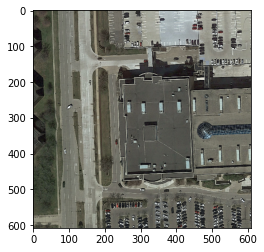

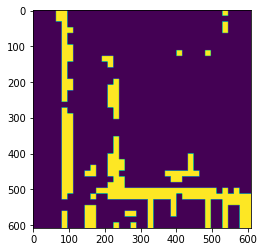

In [ ]:
Y_pred = model.classify(X_test[0:10])

view_image_mask(X_test[0], Y_pred[0])